In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
%matplotlib inline

In [8]:
calendar = pd.read_csv('E:/formula1_2021season_calendar.csv')
calendar.set_index('Round', inplace=True)
drivers = pd.read_csv('E:/formula1_2021season_drivers.csv')
drivers.set_index('Abbreviation', inplace=True)
teams = pd.read_csv('E:/formula1_2021season_teams.csv')
teams.index = range(1,11)
sprintQualiResults = pd.read_csv('E:/formula1_2021season_sprintQualifyingResults.csv')
raceResults = pd.read_csv('E:/formula1_2021season_raceResults.csv')

In [9]:
drivers

,Driver,Number,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
Abbreviation,,,,,,,,,,,,
HAM,Lewis Hamilton,44,Mercedes,United Kingdom,182,4165.5,288,7,1(x103),1,07/01/1985,"Stevenage, England"
BOT,Valtteri Bottas,77,Mercedes,Finland,67,1738.0,178,0,1(x10),1,28/08/1989,"Nastola, Finland"
VER,Max Verstappen,33,Red Bull Racing,Netherlands,60,1557.5,141,1,1(x20),1,30/09/1997,"Hasselt, Belgium"
PER,Sergio Perez,11,Red Bull Racing,Mexico,15,896.0,214,0,1(x2),2,26/01/1990,"Guadalajara, Mexico"
LEC,Charles Leclerc,16,Ferrari,Monaco,13,560.0,81,0,1(x2),1,16/10/1997,"Monte Carlo, Monaco"
SAI,Carlos Sainz,55,Ferrari,Spain,6,536.5,141,0,2(x2),2,01/09/1994,"Madrid, Spain"
NOR,Lando Norris,4,McLaren,United Kingdom,5,306.0,60,0,2(x1),1,13/11/1999,"Bristol, England"
RIC,Daniel Ricciardo,3,McLaren,Australia,32,1274.0,210,0,1(x8),1,01/07/1989,"Perth, Australia"
OCO,Esteban Ocon,31,Alpine,France,2,272.0,89,0,1(x1),3,17/09/1996,"Evreux, Normandy"


In [10]:
teams

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
1,Mercedes,Mercedes-AMG Petronas Formula One Team,"Brackley, United Kingdom",Toto Wolff,Mike Elliott,W12,Mercedes,1970,8,1(x115),127,85
2,Red Bull,Red Bull Racing,"Milton Keynes, United Kingdom",Christian Horner,Pierre Waché,RB16B,Honda,1997,4,1(x75),73,76
3,Ferrari,Scuderia Ferrari,"Maranello, Italy",Mattia Binotto,Enrico Cardile / Enrico Gualteri,SF21,Ferrari,1950,16,1(x239),223,253
4,McLaren,McLaren F1 Team,"Woking, United Kingdom",Andreas Seidl,James Key,MCL35M,Mercedes,1966,8,1(x183),156,160
5,Alpine,Alpine F1 Team,"Enstone, United Kingdom",Davide Brivio,Pat Fry / Remi Taffin,A521,Renault,1986,2,1(x21),20,15
6,AlphaTauri,Scuderia AlphaTauri,"Faenza, Italy",Franz Tost,Jody Egginton,AT02,Honda,1985,0,1(x2),1,2
7,Aston Martin,Aston Martin Cognizant Formula One Team,"Silverstone, United Kingdom",Otmar Szafnauer,Andrew Green,AMR21,Mercedes,2018,0,1(x1),1,0
8,Williams,Williams Racing,"Grove, United Kingdom",Jost Capito,François-Xavier Demaison,FW43B,Mercedes,1978,9,1(x114),129,133
9,Alfa Romeo,Alfa Romeo F1 Team ORLEN,"Hinwil, Switzerland",Frédéric Vasseur,Jan Monchaux,C41,Ferrari,1993,0,1(x1),1,5
10,Haas,Uralkali Haas F1 Team,"Kannapolis, United States",Guenther Steiner,Simone Resta,VF-21,Ferrari,2016,0,4(x1),0,2


In [11]:
driverPts = raceResults.groupby(['Driver', 'Team'])['Points'].sum()
sprintQualiDriverPts = sprintQualiResults.groupby(['Driver', 'Team'])['Points'].sum()
driverPts = (driverPts+sprintQualiDriverPts).sort_values(ascending=False).reset_index()
driverPts.index = [i for i in range(1,22)]
driverPts

,Driver,Team,Points
1,Max Verstappen,Red Bull Racing Honda,395.5
2,Lewis Hamilton,Mercedes,387.5
3,Valtteri Bottas,Mercedes,226.0
4,Sergio Perez,Red Bull Racing Honda,190.0
5,Carlos Sainz,Ferrari,164.5
6,Lando Norris,McLaren Mercedes,160.0
7,Charles Leclerc,Ferrari,159.0
8,Daniel Ricciardo,McLaren Mercedes,115.0
9,Pierre Gasly,AlphaTauri Honda,110.0
10,Fernando Alonso,Alpine Renault,81.0


C:\Users\shash\AppData\Local\Temp\ipykernel_22376\3760698562.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


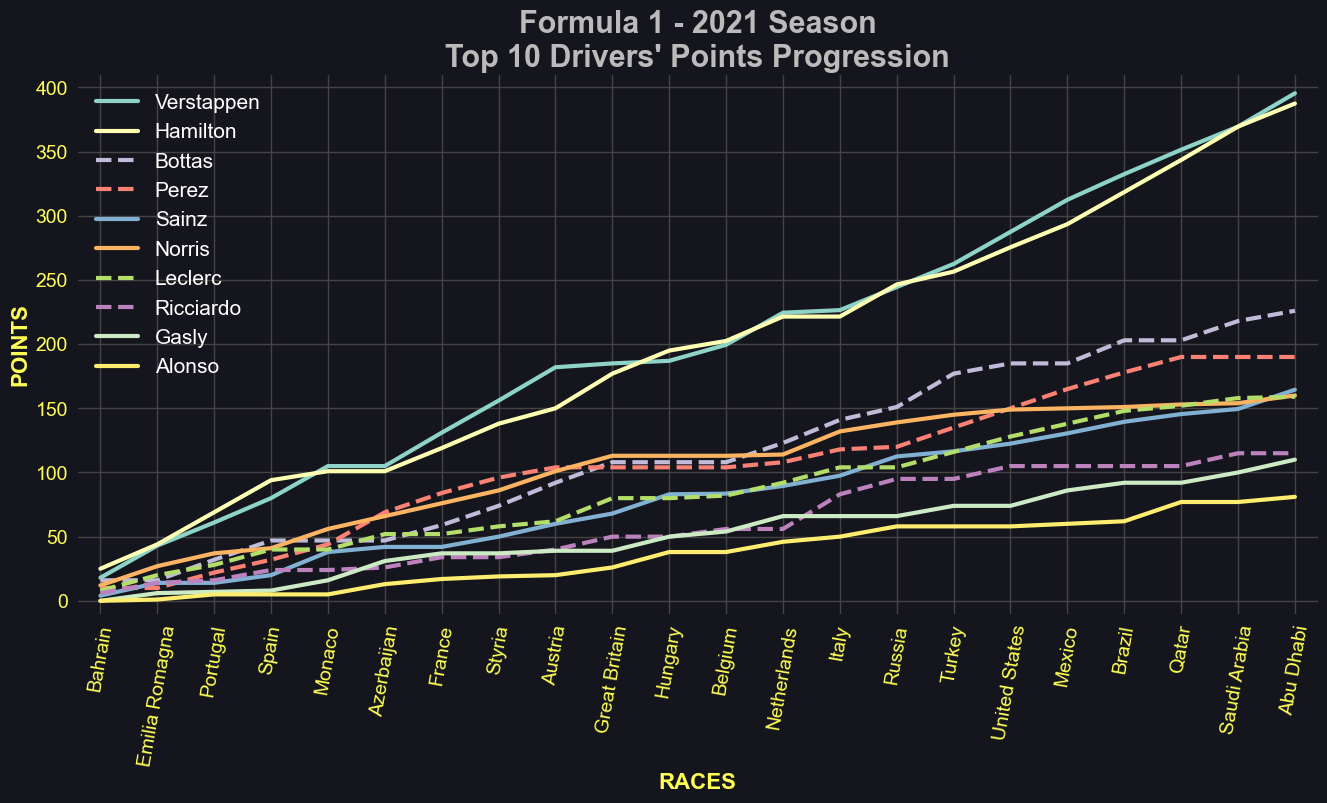

In [29]:
tracks = raceResults['Track'].unique()
plt.style.use('seaborn')
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#15151d'
plt.rcParams['figure.facecolor'] = '#15151d'
plt.rcParams['grid.color'] = '#444444'
top10 = driverPts['Driver'].values[:10]
plt.figure(figsize=(16,7))
plt.axis([-0.4, 21.4, -10, 410])
for i in range(len(top10)):
    ls = '-'
    pts = raceResults[raceResults['Driver'] == top10[i]]['Points'].values
    if top10[i] == "Max Verstappen":     pts[9] += 3;  pts[13] += 2;  pts[18] += 2
    elif top10[i] == "Lewis Hamilton":   pts[9] += 2;
    elif top10[i] == "Valtteri Bottas":  pts[9] += 1;  pts[13] += 3;  pts[18] += 3;  ls = '--';
    elif top10[i] == "Daniel Ricciardo":  pts[13] += 1;  ls = '--';
    elif top10[i] == "Carlos Sainz":     pts[18] += 1;
    elif top10[i] == "Sergio Perez" or top10[i] == "Charles Leclerc":  ls = '--'
    plt.plot(np.cumsum(pts), linewidth=3, label=top10[i].split()[1], linestyle=ls)
plt.title("Formula 1 - 2021 Season\nTop 10 Drivers' Points Progression", color='#bbbbbb', fontsize=22, fontweight='bold')
plt.legend(fontsize=15)
plt.xlabel('RACES', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(range(0,len(tracks)), tracks, fontsize=14, color='#ffff55', rotation=80)
plt.ylabel('POINTS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=14, color='#ffff55')
plt.show()

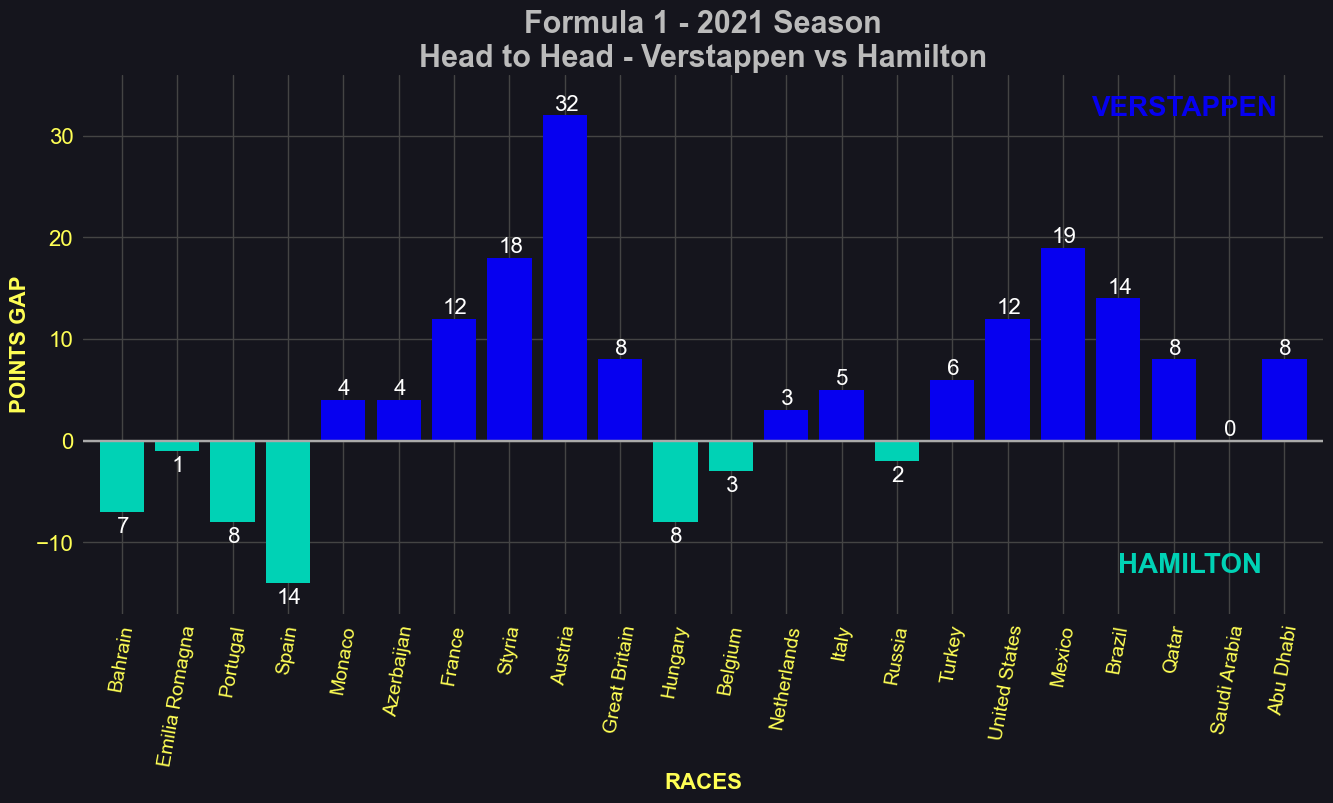

In [18]:
verPts = raceResults[raceResults['Driver'] == 'Max Verstappen']['Points'].values
verPts[9] += 3;  verPts[13] += 2;  verPts[18] += 2
hamPts = raceResults[raceResults['Driver'] == 'Lewis Hamilton']['Points'].values
hamPts[9] += 2
pointsGap = np.cumsum(verPts) - np.cumsum(hamPts)
c = []
for i in range(len(pointsGap)):
    if pointsGap[i] >= 0:   c.append('#0600f0')
    else:    c.append('#00d2b5')
plt.figure(figsize=(16,7))
plt.axis([-0.7, 21.7, min(pointsGap)-3, max(pointsGap)+4])
plt.bar(tracks, pointsGap, color=c)
for i in range(len(pointsGap)):
    if pointsGap[i] >= 0:   vsh = 0.5
    else:   vsh = -2
    plt.text(i-0.2, pointsGap[i]+vsh, "{:2}".format(int(abs(pointsGap[i]))), fontsize=16)
plt.axhline(0, color='#aaaaaa')
plt.text(17.5, 32, "VERSTAPPEN", color="#0600f0", fontsize=20, fontweight='bold')
plt.text(18, -13, "HAMILTON", color="#00d2b5", fontsize=20, fontweight='bold')
plt.title("Formula 1 - 2021 Season\nHead to Head - Verstappen vs Hamilton", color='#bbbbbb', 
          fontsize=22, fontweight='bold')
plt.xlabel('RACES', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(range(0,len(tracks)), tracks, fontsize=14, color='#ffff55', rotation=80)
plt.ylabel('POINTS GAP', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=16, color='#ffff55')
plt.show()

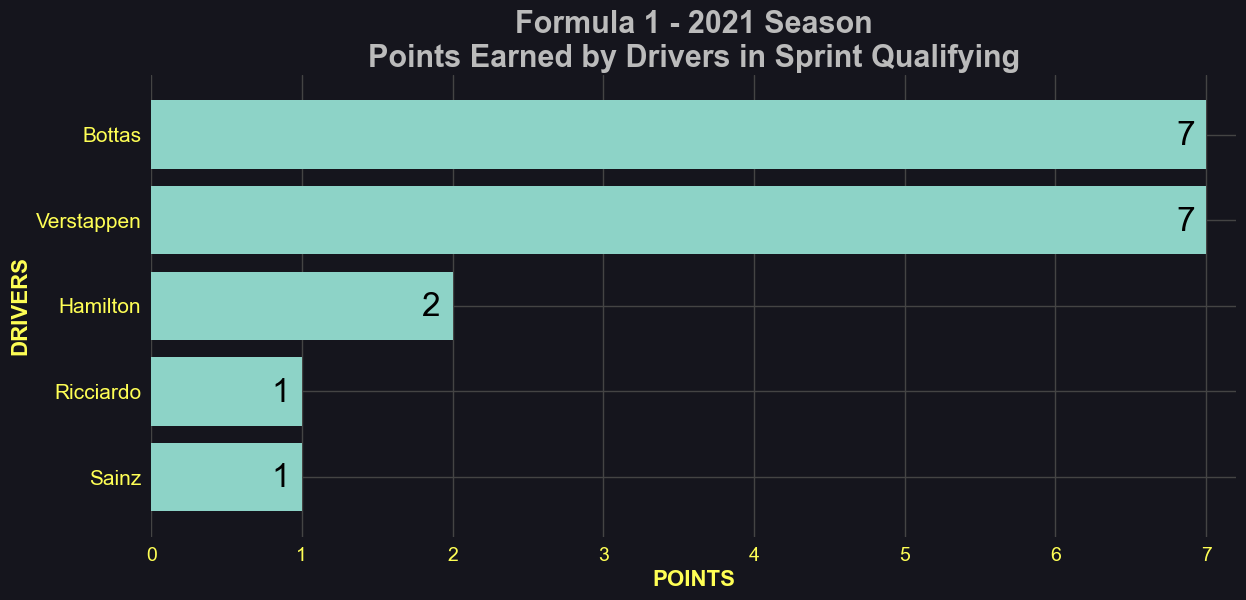

In [30]:
sprintQualiDriver = sprintQualiResults.groupby(['Driver', 'Team'])['Points'].sum().sort_values(ascending=False)
sprintQualiDriver = sprintQualiDriver[sprintQualiDriver > 0].reset_index()
sprintQualiDriver.index = [i for i in range(1,6)]
surnames = [driver.split()[1] for driver in sprintQualiDriver['Driver']]
plt.figure(figsize=(14,6))
plt.axis([0,7.2,4.7,-0.7])
plt.barh(surnames, sprintQualiDriver['Points'])
for i in range(1,len(sprintQualiDriver)+1):
    plt.text(sprintQualiDriver['Points'][i]-0.2, i-0.88, sprintQualiDriver['Points'][i], fontsize=24, color='k')
plt.title("Formula 1 - 2021 Season\nPoints Earned by Drivers in Sprint Qualifying", 
          fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('POINTS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=15, color='#ffff55')
plt.show()

In [19]:
raceWinners = raceResults[raceResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)
raceWinners

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,
Bahrain,44,Lewis Hamilton,Mercedes,2.0,56,1:32:03.897,25.0,No,1:34.015
Emilia Romagna,33,Max Verstappen,Red Bull Racing Honda,2.0,63,2:02:34.598,25.0,No,1:17.524
Portugal,44,Lewis Hamilton,Mercedes,2.0,66,1:34:31.421,25.0,No,1:20.933
Spain,44,Lewis Hamilton,Mercedes,1.0,66,1:33:07.680,25.0,No,1:20.665
Monaco,33,Max Verstappen,Red Bull Racing Honda,2.0,78,1:38:56.820,25.0,No,1:14.649
Azerbaijan,11,Sergio Perez,Red Bull Racing Honda,6.0,51,2:13:36.410,25.0,No,1:44.687
France,33,Max Verstappen,Red Bull Racing Honda,1.0,53,1:27:25.770,26.0,Yes,1:36.404
Styria,33,Max Verstappen,Red Bull Racing Honda,1.0,71,1:22:18.925,25.0,No,1:08.017
Austria,33,Max Verstappen,Red Bull Racing Honda,1.0,71,1:23:54.543,26.0,Yes,1:06.200


In [ ]:
raceWinnersCnt = raceWinners['Driver'].value_counts()
c = assign_color("drivers", raceWinnersCnt.index)
surnames = [driver.split()[1] for driver in raceWinnersCnt.index]
plt.figure(figsize=(14,6))
plt.axis([0,10.2,5.65,-0.65])
plt.barh(surnames, raceWinnersCnt.values, color=c)
for i in range(len(raceWinnersCnt)):
    plt.text(raceWinnersCnt.values[i]-0.5, i+0.15, "{:3}".format(raceWinnersCnt.values[i]), fontsize=24, color='k')
plt.title("Formula 1 - 2021 Season\nDrivers' Race Win Counts", fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('RACE WINS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=15, color='#ffff55')
plt.show()

In [21]:
polePos = raceResults[raceResults['Starting Grid'] == 1].set_index('Track').drop('Starting Grid', axis=1)
polePos

,Position,No,Driver,Team,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,
Bahrain,2,33,Max Verstappen,Red Bull Racing Honda,56,+0.745,18.0,No,1:33.228
Emilia Romagna,2,44,Lewis Hamilton,Mercedes,63,+22.000,19.0,Yes,1:16.702
Portugal,3,77,Valtteri Bottas,Mercedes,66,+33.530,16.0,Yes,1:19.865
Spain,1,44,Lewis Hamilton,Mercedes,66,1:33:07.680,25.0,No,1:20.665
Monaco,NC,16,Charles Leclerc,Ferrari,0,DNS,0.0,No,NaN
Azerbaijan,4,16,Charles Leclerc,Ferrari,51,+3.828,12.0,No,1:45.382
France,1,33,Max Verstappen,Red Bull Racing Honda,53,1:27:25.770,26.0,Yes,1:36.404
Styria,1,33,Max Verstappen,Red Bull Racing Honda,71,1:22:18.925,25.0,No,1:08.017
Austria,1,33,Max Verstappen,Red Bull Racing Honda,71,1:23:54.543,26.0,Yes,1:06.200


In [ ]:
polePosCnt = polePos['Driver'].value_counts()
c = assign_color("drivers", polePosCnt.index)
plt.figure(figsize=(14,6))
plt.axis([0,10.2,4.65,-0.65])
plt.barh([driver.split()[1] for driver in polePosCnt.index], polePosCnt.values, color=c)
for i in range(len(polePosCnt)):
    plt.text(polePosCnt.values[i]-0.42, i+0.15, "{:2}".format(polePosCnt.values[i]), fontsize=24, color='k')
plt.title("Formula 1 - 2021 Season\nDrivers' Pole Position Counts", fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('POLE POSITIONS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=15, color='#ffff55')
plt.show()

In [ ]:
podiumCnt = podiumFinish['Driver'].value_counts()
c = assign_color("drivers", podiumCnt.index)
plt.figure(figsize=(14,7))
plt.axis([0,18.2,12.65,-0.65])
plt.barh([driver.split()[1] for driver in podiumCnt.index], podiumCnt.values, color=c)
for i in range(len(podiumCnt)):
    plt.text(podiumCnt.values[i]-0.6, i+0.25, "{:2}".format(podiumCnt.values[i]), fontsize=18, color='k')
plt.title("Formula 1 - 2021 Season\nDrivers' Podium Counts", fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('PODIUMS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(range(0,20,3), fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=15, color='#ffff55')
plt.show()

In [24]:
topTen = [str(i) for i in range(1,11)]
topTenFinish = raceResults[raceResults['Position'].isin(topTen)]
topTenFinish

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
0,Bahrain,1,44,Lewis Hamilton,Mercedes,2.0,56,1:32:03.897,25.0,No,1:34.015
1,Bahrain,2,33,Max Verstappen,Red Bull Racing Honda,1.0,56,+0.745,18.0,No,1:33.228
2,Bahrain,3,77,Valtteri Bottas,Mercedes,3.0,56,+37.383,16.0,Yes,1:32.090
3,Bahrain,4,4,Lando Norris,McLaren Mercedes,7.0,56,+46.466,12.0,No,1:34.396
4,Bahrain,5,11,Sergio Perez,Red Bull Racing Honda,11.0,56,+52.047,10.0,No,1:33.970
...,...,...,...,...,...,...,...,...,...,...,...
425,Abu Dhabi,6,77,Valtteri Bottas,Mercedes,6.0,58,+7.463,8.0,No,1:26.862
426,Abu Dhabi,7,4,Lando Norris,McLaren Mercedes,3.0,58,+59.200,6.0,No,1:26.762
427,Abu Dhabi,8,14,Fernando Alonso,Alpine Renault,11.0,58,+61.708,4.0,No,1:27.607
428,Abu Dhabi,9,31,Esteban Ocon,Alpine Renault,9.0,58,+64.026,2.0,No,1:28.249


In [ ]:
topTenFinishCnt = topTenFinish['Driver'].value_counts()
c = assign_color("drivers", topTenFinishCnt.index)
plt.figure(figsize=(14,7.5))
plt.axis([0,20.5,17.65,-0.65])
plt.barh([driver.split()[1] for driver in topTenFinishCnt.index], topTenFinishCnt.values, color=c)
for i in range(len(topTenFinishCnt)):
    plt.text(topTenFinishCnt.values[i]-0.57, i+0.26, "{:2}".format(topTenFinishCnt.values[i]), fontsize=16, color='k')
plt.title("Formula 1 - 2021 Season\nDrivers' Top 10 Finish Counts", fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('TOP 10 FINISHES', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(range(0,20,3), fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=13, color='#ffff55')
plt.show()

In [25]:
onePtByFastestLaps = raceResults[raceResults['+1 Pt'] == 'Yes'].set_index('Track').drop('+1 Pt', axis=1)
onePtByFastestLaps

,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Fastest Lap
Track,,,,,,,,,
Bahrain,3,77,Valtteri Bottas,Mercedes,3.0,56,+37.383,16.0,1:32.090
Emilia Romagna,2,44,Lewis Hamilton,Mercedes,1.0,63,+22.000,19.0,1:16.702
Portugal,3,77,Valtteri Bottas,Mercedes,1.0,66,+33.530,16.0,1:19.865
Spain,2,33,Max Verstappen,Red Bull Racing Honda,2.0,66,+15.841,19.0,1:18.149
Monaco,7,44,Lewis Hamilton,Mercedes,7.0,78,+68.231,7.0,1:12.909
France,1,33,Max Verstappen,Red Bull Racing Honda,1.0,53,1:27:25.770,26.0,1:36.404
Styria,2,44,Lewis Hamilton,Mercedes,2.0,71,+35.743,19.0,1:07.058
Austria,1,33,Max Verstappen,Red Bull Racing Honda,1.0,71,1:23:54.543,26.0,1:06.200
Hungary,5,10,Pierre Gasly,AlphaTauri Honda,5.0,70,+63.614,11.0,1:18.394


In [ ]:
onePtFLCnt = onePtByFastestLaps['Driver'].value_counts()
c = assign_color("drivers", onePtFLCnt.index)
plt.figure(figsize=(14,6))
plt.axis([0,6.3,6.65,-0.65])
plt.barh([driver.split()[1] for driver in onePtFLCnt.index], onePtFLCnt.values, color=c)
for i in range(len(onePtFLCnt)):
    plt.text(onePtFLCnt.values[i]-0.2, i+0.15, "{:2}".format(onePtFLCnt.values[i]), fontsize=20, color='k')
plt.title("Formula 1 - 2021 Season\n+1 Points Earned from Fastest Laps for Drivers", 
          fontsize=22, fontweight="bold", color="#bbbbbb")
plt.xlabel('# OF FASTEST LAPS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=15, color='#ffff55')
plt.show()